In [2]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import preprocess_data 

reload(preprocess_data)

%matplotlib inline

In [ ]:
df = pd.merge(outpaitent_state, demographics_event, on=['Internalpatientid'], how="outer", indicator=True)


In [3]:
inpatients_with_readm = pd.read_csv('/home/daisy/FDA_Dataset/inpatients_with_readm.csv').iloc[:,1:]
measurements_blood_pressure = pd.read_csv('/home/bhatti/dataset/VCHAMPS/measurements_blood_pressure_train.csv').iloc[:,1:]

# Exploratory Data Analysis

In [6]:
measurements_blood_pressure

,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State
0,1,61.554040,2005-10-25 00:02:08.0,75.0,140.0,Indiana
1,1,67.037260,2011-04-21 02:50:27.0,72.0,116.0,Indiana
2,1,68.304140,2012-07-27 03:54:47.0,100.0,145.0,Indiana
3,1,68.347339,2012-08-11 22:51:23.0,89.0,155.0,Indiana
4,1,68.781623,2013-01-17 16:23:39.0,72.0,143.0,Indiana
...,...,...,...,...,...,...
21997553,99999,96.324828,2013-03-28 17:23:42.0,62.0,147.0,Arizona
21997554,99999,96.326070,2013-03-29 04:17:14.0,57.0,123.0,Arizona
21997555,99999,96.331619,2013-03-31 04:57:36.0,68.0,154.0,Arizona
21997556,99999,96.357136,2013-04-09 12:47:57.0,79.0,147.0,Arizona


In [46]:
person = inpatients_with_readm[inpatients_with_readm['Internalpatientid'] == 5]
person[person['Died during admission']=='Yes']

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission
337814,5,76.487105,2004-10-29 00:52:53.0,2004-11-05 10:36:25.0,MEDICINE,MEDICINE,OPHTHALMOLOGY,Not specified (no value),Acute and subacute infective endocarditis,Acute respiratory failure,Death without autopsy,Yes,NaN,No,No,Michigan,1


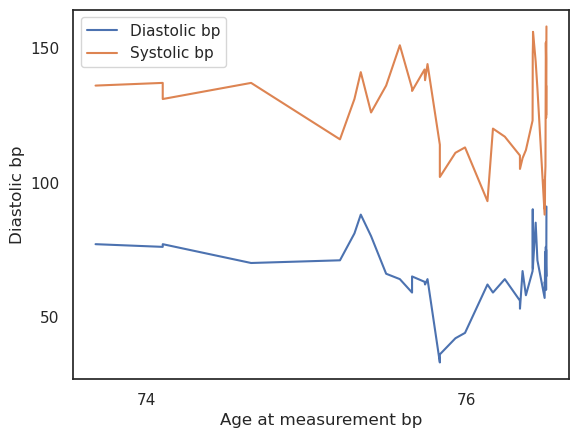

In [45]:
person = measurements_blood_pressure[measurements_blood_pressure['Internalpatientid'] == 5]

sns.lineplot(x='Age at measurement bp', y='Diastolic bp', data=person, label = 'Diastolic bp')
sns.lineplot(x='Age at measurement bp', y='Systolic bp', data=person, label ='Systolic bp')
sns.set_theme(style='white', font_scale=10)



In [10]:
pd.isnull(measurements_blood_pressure).sum() # no Nan values

Internalpatientid        0
Age at measurement bp    0
Measurement date         0
Diastolic bp             0
Systolic bp              0
State                    0
dtype: int64

<Axes: xlabel='Age at measurement bp', ylabel='Count'>

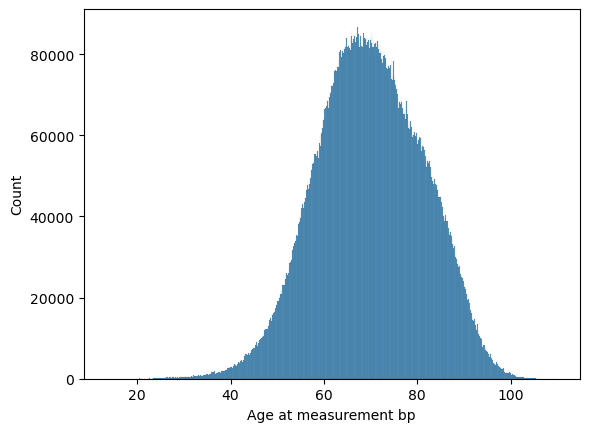

In [9]:
sns.histplot(measurements_blood_pressure['Age at measurement bp'])

In [11]:
# prepreocess Measurement date 
measurements_blood_pressure['Measurement date'] = measurements_blood_pressure['Measurement date'].apply(preprocess_data.preprocess_time_string)

<Axes: xlabel='Measurement date', ylabel='Count'>

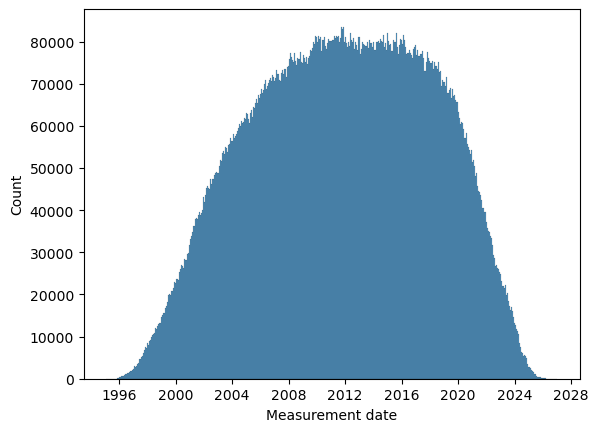

In [14]:
sns.histplot(measurements_blood_pressure['Measurement date'])

<Axes: xlabel='Diastolic bp', ylabel='Count'>

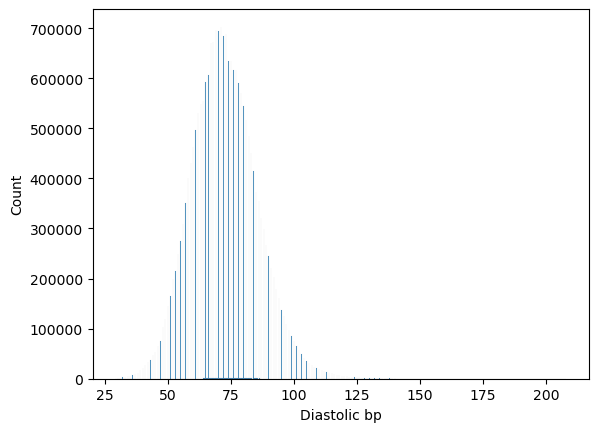

In [15]:
sns.histplot(measurements_blood_pressure['Diastolic bp'])

<Axes: xlabel='Systolic bp', ylabel='Count'>

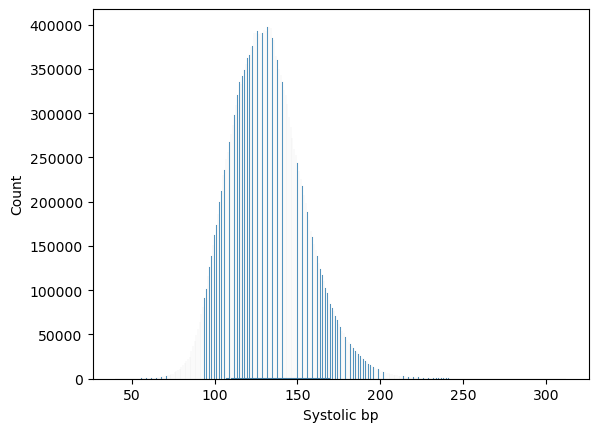

In [17]:
sns.histplot(measurements_blood_pressure['Systolic bp'])

In [18]:
measurements_blood_pressure['State'].value_counts()

Texas                   1882958
Florida                 1751959
California              1618878
New York                1122115
Ohio                     983518
Missouri                 942731
Illinois                 808302
Pennsylvania             794212
Tennessee                790882
North Carolina           615281
Georgia                  601313
Wisconsin                535071
Arizona                  518497
Michigan                 507291
West Virginia            499118
Louisiana                485144
Virginia                 456767
Arkansas                 417422
Oregon                   403929
Kentucky                 400871
Puerto Rico              393629
South Carolina           384843
Alabama                  380431
Massachusetts            380143
Minnesota                377597
Nebraska                 357697
Oklahoma                 356005
Mississippi              305500
Washington               303333
Indiana                  292252
Nevada                   251105
District

In [ ]:
measurements_blood_pressure.to_csv('/home/vivi/FDA_datasets/measurements_blood_pressure_preprocessed.csv')